# Logistic regression

In this exercise you will train a logistic regression model via gradient descent in two simple scenarios.
 
The general setup is as follows:
* we are given a set of pairs $(x, y)$, where $x \in R^D$ is a vector of real numbers representing the features, and $y \in \{0,1\}$ is the target,
* for a given $x$ we model the probability of $y=1$ by $h(x):=g(w^Tx)$, where $g$ is the sigmoid function: $g(z) = \frac{1}{1+e^{-z}}$,
* to find the right $w$ we will optimize the so called logarithmic loss: $J(w) = -\frac{1}{n}\sum_{i=1}^n y_i \log{h(x_i)} + (1-y_i) \log{(1-h(x_i))}$,
* with the loss function in hand we can improve our guesses iteratively:
    * $w_j^{t+1} = w_j^t - \text{step_size} \cdot \frac{\partial J(w)}{\partial w_j}$,
* we can end the process after some predefined number of epochs (or when the changes are no longer meaningful).

Let's start with the simplest example - linear separated points on a plane. 

In [2]:
%matplotlib inline

import numpy as np

np.random.seed(123)

# these parametrize the line
a = 0.3
b = -0.2
c = 0.001

# True/False mapping
def lin_rule(x, noise=0.):
    return a * x[0] + b * x[1] + c + noise < 0.

# Just for plotting
def get_y_fun(a, b, c):
    def y(x):
        return - x * a / b - c / b
    return y

lin_fun = get_y_fun(a, b, c)

In [3]:
# Training data

n = 500
range_points = 1
sigma = 0.05

X = range_points * 2 * (np.random.rand(n, 2) - 0.5)
y = [lin_rule(x, sigma * np.random.normal()) for x in X]

print(X[:10])
print(y[:10])

[[ 0.39293837 -0.42772133]
 [-0.54629709  0.10262954]
 [ 0.43893794 -0.15378708]
 [ 0.9615284   0.36965948]
 [-0.0381362  -0.21576496]
 [-0.31364397  0.45809941]
 [-0.12285551 -0.88064421]
 [-0.20391149  0.47599081]
 [-0.63501654 -0.64909649]
 [ 0.06310275  0.06365517]]
[False, True, False, False, False, True, False, True, True, False]


Let's plot the data.

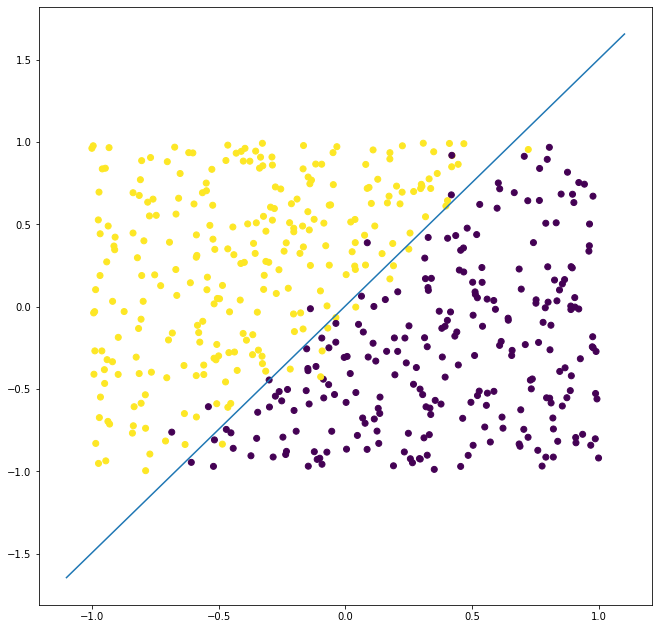

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

range_plot = 1.1
h = .002

plt.figure(figsize=(11,11))

plt.scatter(X[:, 0], X[: , 1], c=y)

_x = np.linspace(-range_plot, range_plot, 1000)
_y = lin_fun(_x)

plt.plot(_x, _y)

Now, let's implement and train a logistic regression model.

In [6]:
import numpy as np

In [17]:
################################################################
# TODO: Implement logistic regression and compute its accuracy #
################################################################
def sigmoid(x):
  return 1/(1 + np.exp(-x))

def gradient(xs, ys, ws):
  return -np.dot(xs.T, ys-sigmoid(np.dot(xs,ws)))/xs.shape[0]

def loss(xs, ys, ws):
  z = sigmoid(np.dot(xs, ws))
  return -np.mean(ys*np.log(z) + (1-ys)*np.log(1-z))

lr = .5
epochs = 100000


def predict(xs, ws):
  xs = np.c_[np.array(xs), np.ones(xs.shape[0])]
  return sigmoid(np.dot(xs, ws))

def fit(xs, ys, lr, epochs, improve_threshold=0.001):
  prev_losses = []
  xs = np.c_[np.array(xs), np.ones(xs.shape[0])]
  ws = np.zeros(xs.shape[1])
  while True:
    for i in range(epochs):
      ws -= lr * gradient(xs, ys, ws)
    loss_val = loss(xs, ys, ws)
    iter = len(prev_losses)
    print('Iter: {:>3} Loss: {:8.8f}'.format(iter, loss_val), 'Weights:', [round(w,4) for w in ws])
    if prev_losses and prev_losses[-1] - loss_val < improve_threshold:
      break
    else:
      prev_losses.append(loss_val)
  return ws

xs = np.array(X)
ys = np.array(y)

W = fit(xs, ys, lr, epochs)




Iter:   0 Loss: 0.09136576 Weights: [-16.5462, 11.4641, 0.0774]
Iter:   1 Loss: 0.09136576 Weights: [-16.5462, 11.4641, 0.0774]


Let's visually asses our model. We can do this by using our estimates for $a,b,c$.

<Figure size 792x792 with 0 Axes>

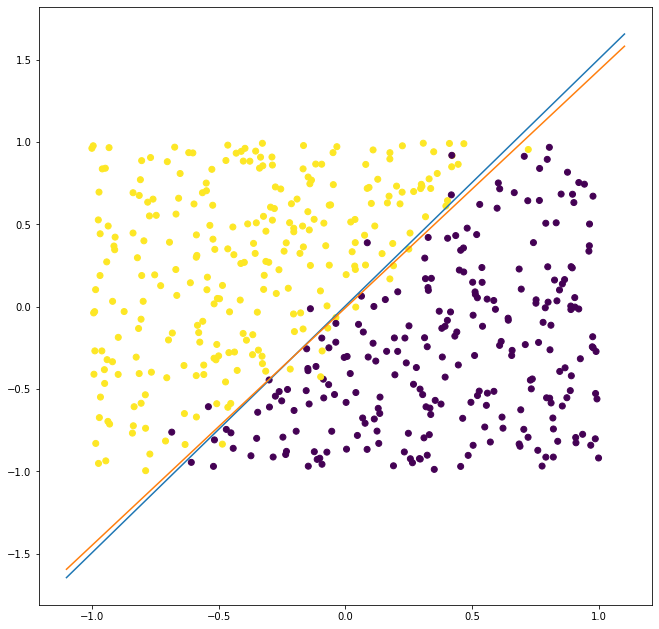

In [18]:
plt.figure(figsize=(11,11))

#################################################################
# TODO: Pass your estimates for a,b,c to the get_y_fun function #
#################################################################

lin_fun2 = get_y_fun(W[0], W[1], W[2])

_y2 = lin_fun2(_x)

plt.figure(figsize=(11,11))
plt.scatter(X[:, 0], X[: , 1], c=y)
plt.plot(_x, _y, _x, _y2)

Let's now complicate the things a little bit and make our next problem nonlinear.

In [20]:
# Parameters of the ellipse
s1 = 1.
s2 = 2.
r = 0.75
m1 = 0.15
m2 = 0.125

# True/False mapping, checks whether we are inside the ellipse
def circle_rule(x, noise=0.):
    return s1 * (x[0] - m1) ** 2 + s2 * (x[1] - m2) ** 2 + noise < r ** 2.

In [21]:
# Training data

n = 500
range_points = 1

sigma = 0.1

X = range_points * 2 * (np.random.rand(n, 2) - 0.5)

y = [circle_rule(x, sigma * np.random.normal()) for x in X]

print(X[:10])
print(y[:10])

[[ 0.18633789  0.87560968]
 [-0.81999293  0.61838609]
 [ 0.22604784  0.28001611]
 [ 0.9846182  -0.35783437]
 [-0.27962406  0.07170775]
 [ 0.2501677  -0.37650776]
 [ 0.41264707 -0.8357508 ]
 [-0.61039043 -0.97349628]
 [ 0.49924022  0.89579621]
 [ 0.537422   -0.65425777]]
[False, False, True, False, True, True, False, False, False, False]


Let's plot the data.

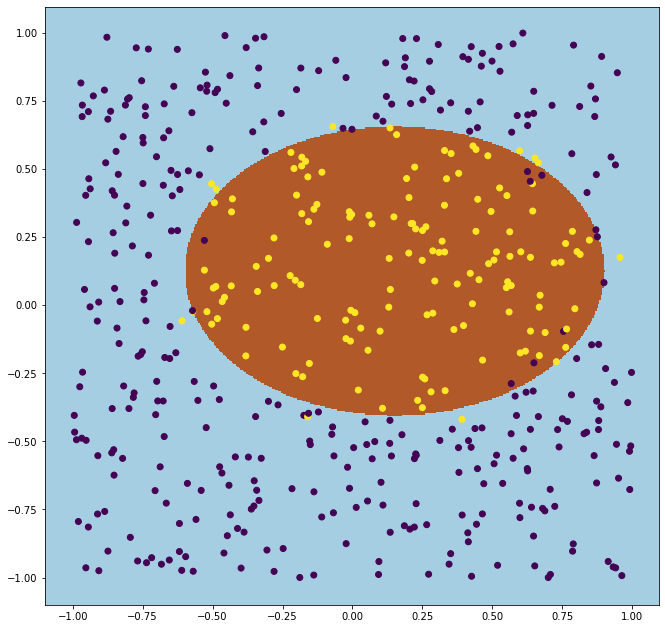

In [22]:
range_plot = 1.1
h = .005

plt.figure(figsize=(11,11))

xx, yy = np.meshgrid(np.arange(-range_plot, range_plot, h), np.arange(-range_plot, range_plot, h))
Z = np.array(list(map(circle_rule, np.c_[xx.ravel(), yy.ravel()])))

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[: , 1], c=y)

Now, let's train a logistic regression model to tackle this problem. Note that we now need a nonlinear decision boundary. 

Hint: 
<sub><sup><sub><sup><sub><sup>
Use feature engineering.
</sup></sub></sup></sub></sup></sub>

In [23]:
################################################################
# TODO: Implement logistic regression and compute its accuracy #
################################################################
xs = np.array(X)
ys = np.array(y)
def scale(xs):
  return np.c_[xs, xs[:,0]**2, xs[:,1]**2, xs[:, 0] * xs[:, 1]]

new_xs = scale(xs)
W = fit(new_xs, ys, 0.5, 100000)

Iter:   0 Loss: 0.08606800 Weights: [5.0009, 10.0928, -19.768, -39.8729, 0.5957, 10.317]
Iter:   1 Loss: 0.08593745 Weights: [5.2277, 10.5606, -20.7248, -41.7913, 0.6441, 10.8197]


Let's visually asses our model. 

Contrary to the previous scenario, converting our weights to parameters of the ground truth curve may not be straightforward. It's easier to just provide predictions for a set of points in $R^2$.

In [26]:
range_plot = 1.1
h = .005

xx, yy = np.meshgrid(np.arange(-range_plot, range_plot, h), np.arange(-range_plot, range_plot, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

print(X_plot)
print(X_plot.shape)

############################################################
# TODO: Compute true/false predictions for the X_plot data #
############################################################


preds = (predict(scale(X_plot), W) > 0.5)
print(preds.shape)

[[-1.1   -1.1  ]
 [-1.095 -1.1  ]
 [-1.09  -1.1  ]
 ...
 [ 1.085  1.095]
 [ 1.09   1.095]
 [ 1.095  1.095]]
(193600, 2)
(193600,)


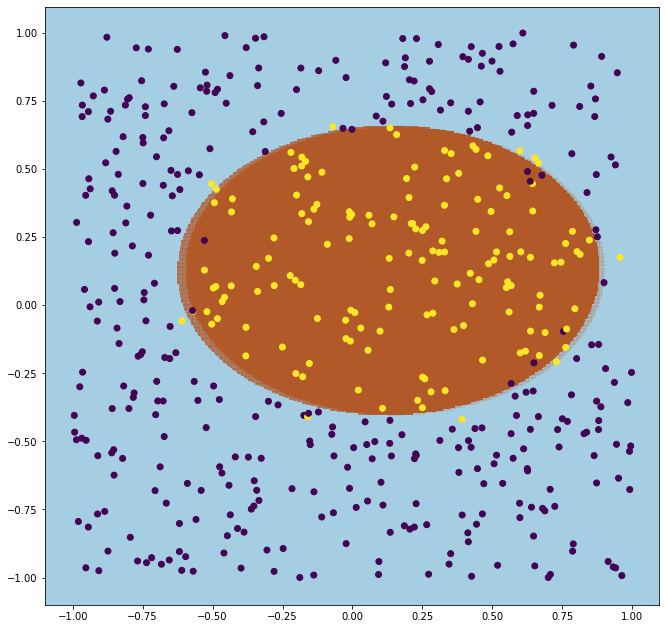

In [27]:
plt.figure(figsize=(11,11))

Z = preds
Z = np.array(Z).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

Z = np.array(list(map(circle_rule, X_plot)))
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, alpha=0.1, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[: , 1], c=y)